In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,1.000000,0.750,1.000000,0.875000,0.875000,0.857143
1,0.750000,0.875,1.000000,1.000000,1.000000,0.750000
2,1.000000,1.000,0.857143,0.857143,1.000000,0.857143
3,0.857143,0.875,0.857143,0.714286,0.625000,0.833333
4,0.857143,0.875,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
45,1.000000,1.000,0.714286,1.000000,1.000000,0.857143
46,0.857143,0.875,0.875000,0.875000,0.857143,0.857143
47,0.857143,1.000,1.000000,0.857143,1.000000,1.000000
48,0.571429,1.000,0.857143,1.000000,1.000000,1.000000


In [5]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,1.988983,4.487055,3.164222,2.818791,2.551399,2.142054
1,2.963465,4.486219,3.171052,2.821697,2.352643,2.437552
2,1.797762,4.261758,3.211438,2.741678,2.438083,2.367804
3,1.936768,4.408385,3.110395,2.708993,2.511797,2.070782
4,3.764050,4.469402,3.344406,2.838697,2.579954,2.311285
...,...,...,...,...,...,...
45,2.276374,4.115450,3.297268,2.506919,2.254807,2.236909
46,2.269994,4.464212,3.360873,2.809932,2.387414,2.255521
47,2.851552,4.407969,3.144450,2.633970,2.482582,2.221694
48,2.183294,4.522600,3.157736,2.687392,2.417260,2.333396


In [6]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)
MSE_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,3.943778,4.195854,4.525932,4.391973,4.301455,4.242597
1,4.772806,4.651590,4.337047,5.094551,4.766633,5.054165
2,5.235349,4.532415,5.465755,5.098406,4.487157,5.384619
3,5.451078,4.989379,4.865969,4.812050,5.268262,5.963179
4,4.251168,4.712914,4.699878,4.884016,4.886321,4.781196
...,...,...,...,...,...,...
45,5.096898,4.620535,4.615354,4.869700,5.089505,5.245597
46,4.420660,4.558714,4.776773,4.712285,5.099658,4.754486
47,3.876295,4.178914,4.952233,4.929113,4.608875,4.477992
48,4.635493,4.831753,5.507566,5.401571,6.019840,4.787880


In [7]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 1.0       0.897286
UV_0.1    0.904905
UV_0.2    0.898607
UV_0.3    0.901179
UV_0.4    0.894845
UV_0.5    0.896810
dtype: float64
Length :
 1.0       2.719723
UV_0.1    4.311975
UV_0.2    3.189076
UV_0.3    2.710082
UV_0.4    2.435756
UV_0.5    2.250320
dtype: float64
MSE :
 1.0       4.636818
UV_0.1    4.674803
UV_0.2    4.754009
UV_0.3    4.874065
UV_0.4    4.946112
UV_0.5    5.013931
dtype: float64


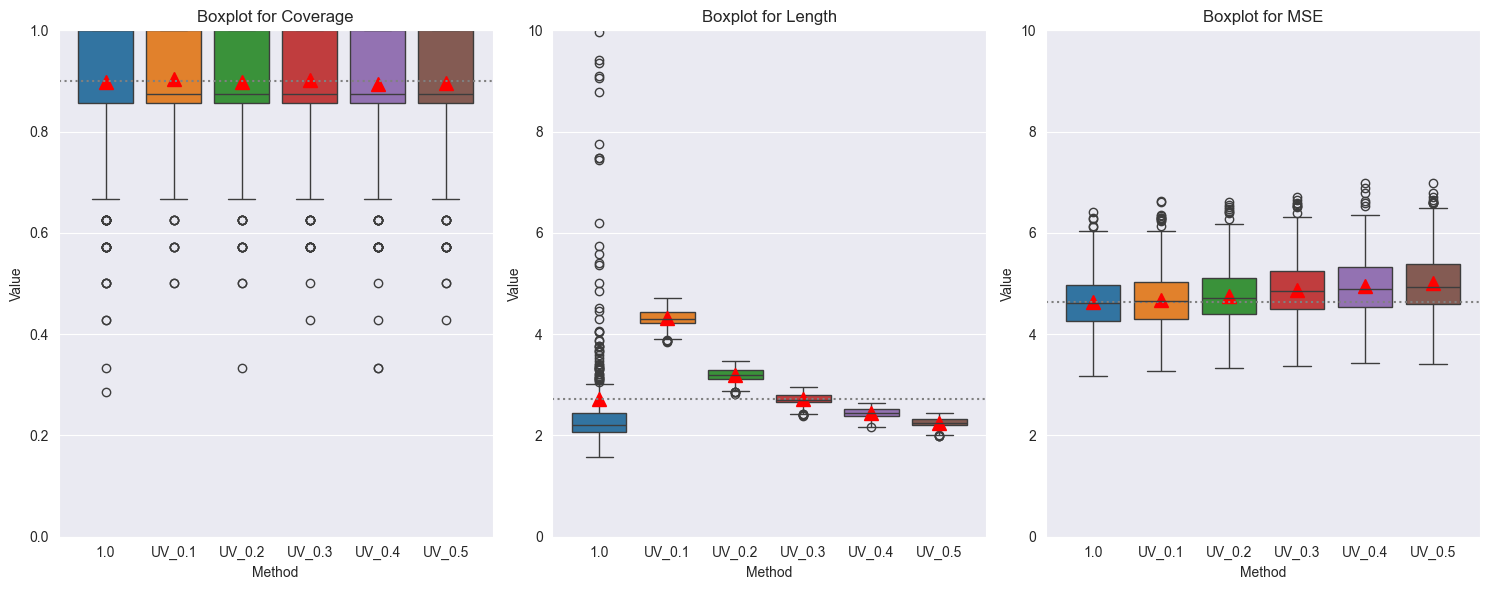

In [8]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=10,
         len_baseline_key=1.0,
         MSE_baseline_key=1.0,
         metrics=["Coverage", "Length", "MSE"])